In [175]:
# Advanced regression for house prices

In [176]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [177]:
df_train=pd.read_csv(r"A:\Data_Uhasselt\Projects\house-prices-advanced-regression-techniques\train.csv", sep=';')
df_test= pd.read_csv(r"A:\Data_Uhasselt\Projects\house-prices-advanced-regression-techniques\test.csv", sep=',')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [178]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [179]:
df_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [180]:
df_test.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,...,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,...,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,70,934,1311,1457,...,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,...,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,...,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,1825.500000,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,2190.000000,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,2554.500000,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


In [181]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [182]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

C:\Users\siava\AppData\Local\Temp\ipykernel_10828\3736788637.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'],kde=False)
C:\Users\siava\AppData\Local\Temp\ipykernel_10828\3736788637.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_train['SalePrice']),kde=Fal

(np.float64(10.0), np.float64(14.0), np.float64(0.0), np.float64(180.0))

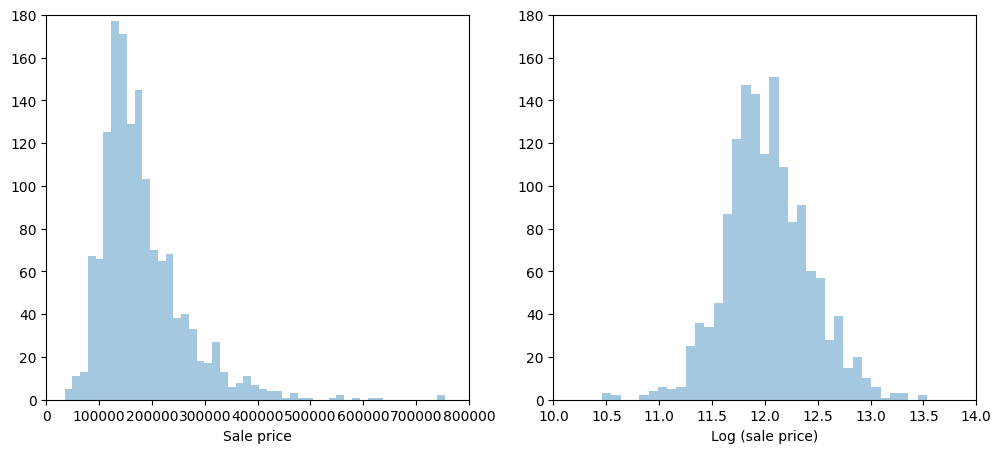

In [183]:
plt.figure(figsize=(12,5))
#f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(df_train['SalePrice'],kde=False)
plt.xlabel('Sale price')
plt.axis([0,800000,0,180])
plt.subplot(122)
sns.distplot(np.log(df_train['SalePrice']),kde=False)
plt.xlabel('Log (sale price)')
plt.axis([10,14,0,180])

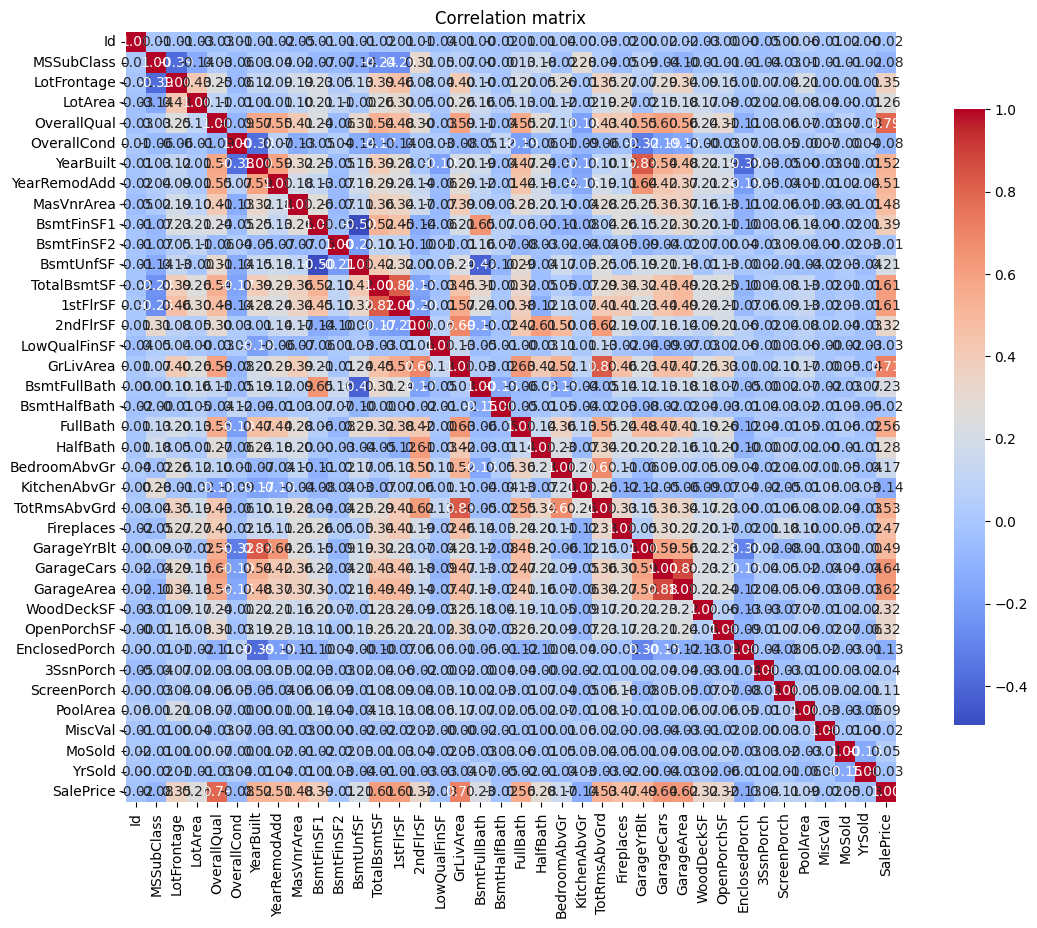

In [184]:
cor= df_train.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation matrix')
plt.show()

In [185]:
cor_list = cor['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
cor_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [186]:
missing = df_train.isnull().sum()
missing= missing[missing > 0] 
print(missing)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [187]:
missing = df_test.isnull().sum()
missing= missing[missing > 0] 
print(missing)

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [188]:
# we will drop the columns with a lot of missing values
df_train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1, inplace=True)
df_test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1, inplace=True)

In [189]:
# for categorial variables we will fill the missing values with 'None'
fill_none_cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                  'BsmtFinType1', 'BsmtFinType2', 'GarageType', 
                  'GarageFinish', 'GarageQual', 'GarageCond']

In [190]:
df_train[fill_none_cols] = df_train[fill_none_cols].fillna('None')
df_test[fill_none_cols] = df_test[fill_none_cols].fillna('None')

In [191]:
# for those numerical variables where 0 makes sense, we will fill the missing values with 0

In [192]:
df_train[['MasVnrArea', 'GarageYrBlt']]= df_train[['MasVnrArea', 'GarageYrBlt']].fillna(0)
df_test[['MasVnrArea', 'GarageYrBlt']]= df_test[['MasVnrArea', 'GarageYrBlt']].fillna(0)

In [193]:
# for electric, we will fill the missing values with the most frequent value

In [194]:
df_train['Electrical'].fillna(df_train['Electrical'].mode()[0], inplace=True)
df_test['Electrical'].fillna(df_test['Electrical'].mode()[0], inplace=True)

C:\Users\siava\AppData\Local\Temp\ipykernel_10828\2734464820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Electrical'].fillna(df_train['Electrical'].mode()[0], inplace=True)
C:\Users\siava\AppData\Local\Temp\ipykernel_10828\2734464820.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [195]:
# for LotFrontage, we will fill the missing values with the median value of the column

In [196]:
df_train['LotFrontage'].fillna(df_train.groupby('Neighborhood')['LotFrontage'].transform('mean'), inplace=True)
df_test['LotFrontage'].fillna(df_test.groupby('Neighborhood')['LotFrontage'].transform('mean'), inplace=True)

C:\Users\siava\AppData\Local\Temp\ipykernel_10828\4289755141.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['LotFrontage'].fillna(df_train.groupby('Neighborhood')['LotFrontage'].transform('mean'), inplace=True)
C:\Users\siava\AppData\Local\Temp\ipykernel_10828\4289755141.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on

In [197]:
missing = df_train.isnull().sum()
missing= missing[missing > 0] 
print(missing)

Series([], dtype: int64)


In [198]:
missing = df_test.isnull().sum()
missing= missing[missing > 0]
print(missing)

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64


In [199]:
for i in df_test.columns:
    if df_test[i].isnull().sum() > 0:
        df_test[i].fillna(df_test[i].mode()[0], inplace=True)


C:\Users\siava\AppData\Local\Temp\ipykernel_10828\969731952.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[i].fillna(df_test[i].mode()[0], inplace=True)


In [200]:
missing = df_test.isnull().sum()
missing= missing[missing > 0]
print(missing)

Series([], dtype: int64)


In [201]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [202]:
df_train.drop(['Id'], axis=1,inplace=True)

In [203]:
cat_cols_train = df_train.select_dtypes(include=['object', 'category']).columns
print(cat_cols_train)
len(cat_cols_train)


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


38

In [204]:
cat_cols_test = df_test.select_dtypes(include=['object', 'category']).columns
print(cat_cols_test)
len(cat_cols_test)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


38

In [205]:
num_cols_train= df_train.select_dtypes(include=['int64','float64']).columns
print(num_cols_train)
len(num_cols_train)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


37

In [206]:
num_cols_test= df_test.select_dtypes(include=['int64','float64']).columns
print(num_cols_test)
len(num_cols_test)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


37

In [207]:
num_cols_train = num_cols_train.drop('SalePrice')
print(num_cols_train)
len(num_cols_train)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


36

In [208]:
df1_train= pd.get_dummies(df_train, columns=cat_cols_train)
df1_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


In [209]:
df1_test= pd.get_dummies(df_test, columns=cat_cols_test)
df1_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,False,True,False
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,True,False,False,False,False,True,False
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,True,False,False,False,False,True,False


In [210]:
from sklearn.preprocessing import StandardScaler

In [211]:
scaler= StandardScaler()
df1_train[num_cols_train]= scaler.fit_transform(df1_train[num_cols_train])
df1_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.255370,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,False,False,False,True,False,False,False,False,True,False
1,-0.872563,0.413696,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,False,False,False,True,False,False,False,False,True,False
2,0.073375,-0.121557,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,False,False,False,True,False,False,False,False,True,False
3,0.309859,-0.478392,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,False,False,False,True,True,False,False,False,False,False
4,0.073375,0.592114,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,False,False,False,True,False,False,False,False,True,False


In [212]:
df1_test[num_cols_test]= scaler.fit_transform(df1_test[num_cols_test])
df1_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730864,-0.874711,0.512085,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063936,...,False,False,False,True,False,False,False,False,True,False
1,-1.728490,-0.874711,0.559639,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063714,...,False,False,False,True,False,False,False,False,True,False
2,-1.726115,0.061351,0.226760,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773668,...,False,False,False,True,False,False,False,False,True,False
3,-1.723741,0.061351,0.416977,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.358376,...,False,False,False,True,False,False,False,False,True,False
4,-1.721367,1.465443,-1.247420,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.386513,...,False,False,False,True,False,False,False,False,True,False


In [213]:
from sklearn.model_selection import train_test_split

X = df1_train.drop('SalePrice', axis=1)
y = df1_train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [214]:
from sklearn.linear_model import Lasso # We need feature selection

model = Lasso(alpha=0.1)  
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

a:\Apps\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.144e+11, tolerance: 6.648e+08
  model = cd_fast.enet_coordinate_descent(


In [215]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 26733.427341872215
R²: 0.897980783987752


In [216]:
# Align test set columns with train set
missing_cols = set(df1_train.columns) - set(df1_test.columns)
for col in missing_cols:
    df1_test[col] = 0  # Add missing columns with default value 0

# Ensure the test set has the same column order as the train set
df1_test = df1_test[df1_train.columns.drop('SalePrice')]

In [217]:
df1_test['SalePrice'] = model.predict(df1_test)

In [218]:
df1_test[ 'SalePrice'].to_csv('submission.csv', index=False)

In [219]:
df1_test['Id'] = df_test['Id']

In [220]:
print(df1_test.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SalePrice', 'Id'],
      dtype='object', length=281)


In [221]:
df1_test.iloc[0,-1]

np.int64(1461)

In [222]:
df1_test.iloc[0,-1] > 120000

np.False_

In [224]:
final= df1_test[['Id', 'SalePrice']]
print(final)

        Id      SalePrice
0     1461  118283.464156
1     1462  161878.041605
2     1463  193407.710606
3     1464  199259.761915
4     1465  207554.875987
...    ...            ...
1454  2915   77680.537376
1455  2916   84265.414950
1456  2917  188980.461209
1457  2918  115664.357609
1458  2919  223951.408331

[1459 rows x 2 columns]


In [228]:
final.to_csv(r'a:\Data_Uhasselt\Projects\house-prices-advanced-regression-techniques\final_submission.csv')

In [ ]:
# if you have an issue with the amount in Excel file Convert SalePrice to integer
df1_test['SalePrice'] = df1_test['SalePrice'].astype(int)

# Save to Excel
final = df1_test[['Original_Id', 'SalePrice']]
final.to_excel(r'a:\\Data_Uhasselt\\Projects\\house-prices-advanced-regression-techniques\\final_submission2.xlsx', index=False)